# My first applied machine learning notebook. 
We are going to get some data about cars and use it to create and evaluate a predictive model.  Here are the steps will we use:
1. Read in the data from a CSV file
2. Clean the data
3. Create a model and fit it to the data
4. Get performance metrics for the model

### Getting the data:
We need to get the data where we can find it.   Copy automobile_price_data3.csv into the same Getting the data:

* Assignment is not an expression. Nothing is displayed.
* Print will cause something to be displayed.
* The last expression evaluated in a cell will be displayed.

# Section 1 - Load CSV file

In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Import pandas
import pandas as pd

# reading csv file 
automobile = pd.read_csv("automobile_price_data3.csv")
print(automobile.head())

   normalized-losses         make      fuel doors         body drive  weight  \
0                NaN  alfa-romero  unleaded   two  convertible   rwd    2548   
1                NaN  alfa-romero  unleaded   two  convertible   rwd    2548   
2                NaN  alfa-romero  unleaded   two    hatchback   rwd    2823   
3              164.0         audi  unleaded  four       saloon   fwd    2337   
4              164.0         audi  unleaded  four       saloon   4wd    2824   

   engine-size    bhp  mpg    price  
0          130  111.0   27  13495.0  
1          130  111.0   27  16500.0  
2          152  154.0   26  16500.0  
3          109  102.0   30  13950.0  
4          136  115.0   22  17450.0  


In [3]:
#Set up precision and call heads; Test if pandas is operating correctly

pd.set_option("display.precision", 2)

automobile.head()

,normalized-losses,make,fuel,doors,body,drive,weight,engine-size,bhp,mpg,price
0,NaN,alfa-romero,unleaded,two,convertible,rwd,2548,130,111.0,27,13495.0
1,NaN,alfa-romero,unleaded,two,convertible,rwd,2548,130,111.0,27,16500.0
2,NaN,alfa-romero,unleaded,two,hatchback,rwd,2823,152,154.0,26,16500.0
3,164.0,audi,unleaded,four,saloon,fwd,2337,109,102.0,30,13950.0
4,164.0,audi,unleaded,four,saloon,4wd,2824,136,115.0,22,17450.0


### Clean the data:
Remove columns or rows that have missing data.
Look at the distribution of the data values

In [14]:
automobile.drop(axis='columns', labels='normalized-losses', inplace=True)
automobile.dropna(axis='index', how="any", inplace=True)

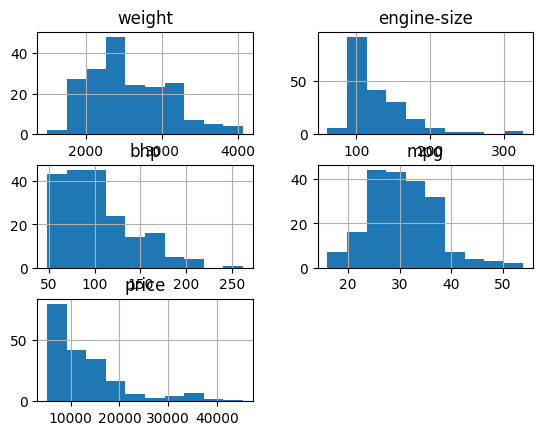

In [15]:
#import matplotlib

%matplotlib inline

histogram = automobile.hist()

### Create and train a model
We need to split the data into a training set and a test set

In [28]:
automobile.drop(axis='columns', labels='normalized-losses', inplace=True)
automobile.dropna(axis='index', how="any", inplace=True)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    automobile.mpg.values.reshape(-1,1), automobile.price.values,
    random_state=11)

In [30]:
X_train.shape

(147, 1)

In [31]:
X_test.shape

(50, 1)

In [32]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [33]:
linear_regression.coef_

array([-760.10551222])

In [34]:
linear_regression.intercept_

36451.87379284139

### Determine the performance of the model

In [50]:
import numpy as np

predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {predicted: {p:} , expected: {e:}}')

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [42]:
predict = (lambda x: linear_regression.coef_ * x +
                    linear_regression.intercept_)

# Visualize with Seaborn

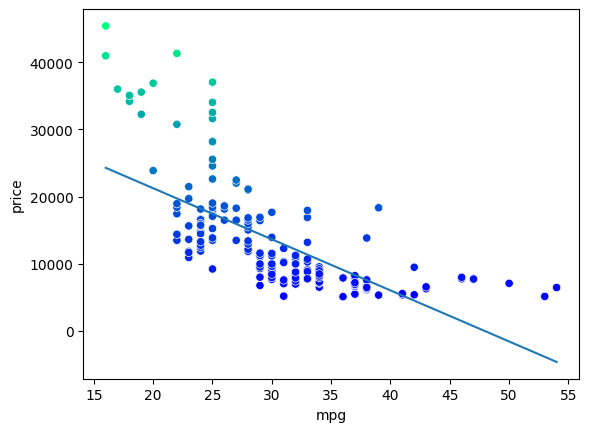

In [46]:
import seaborn as sns
import numpy as np

axes = sns.scatterplot(data=automobile, x='mpg', y='price',
                       hue='price', palette='winter', legend=False)

x = np.array([min(automobile.mpg.values), max(automobile.mpg.values)])

y = predict(x)

import matplotlib.pyplot as plt

line = plt.plot(x,y)